In [15]:
!pip install --upgrade tensorflow
!pip install numpy scipy
!pip install scikit-learn
!pip install pillow
!pip install h5py

     |████████████████████████████████| 102.7MB 6.9MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/b8/83/755bd5324777875e9dff19c2e59daec837d0378c09196634524a3d7269ac/opt_einsum-3.1.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/95/00/5e6cdf86190a70d7382d320b2b04e4ff0f8191a37d90a422a2f8ff0705bb/tensorflow_estimator-2.0.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/9b/a6/e8ffa4e2ddb216449d34cfcb825ebb38206bee5c4553d69e7bc8bc2c5d64/tensorboard-2.0.0-py3-none-any.whl
  Stored in directory: /Users/saniyanafees/Library/Caches/pip/wheels/2c/b1/94/43d03e130b929aae7ba3f8d15cbd7bc0d1cb5bb38a5c721833
Successfully built opt-einsum
  Found existing installation: tensorflow-estimator 1.14.0
    Uninstalling tensorflow-estimator-1.14.0:
      Successfully uninstalled tensorflow-estimator-1.14.0
  Found existing installation: tensorboard 1.14.0
    Uninstalling tensorboard-1.14.0:
      Successfully uninstalled tensorboard-1.14.0

In [16]:
!pip install keras

     |████████████████████████████████| 378kB 2.1MB/s eta 0:00:01


In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../cell_images"))


['.DS_Store', 'Parasitized', 'Uninfected']


I'll start by mounting my drive so I can import my data sets

In [21]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils
parasitized_data = os.listdir('../cell_images/Parasitized/')
print(parasitized_data[:10]) #the output we get are the .png files

uninfected_data = os.listdir('../cell_images/Uninfected/')
print('\n')
print(uninfected_data[:10])

['C118P79ThinF_IMG_20151002_105018_cell_150.png', 'C189P150ThinF_IMG_20151203_142224_cell_84.png', 'C91P52ThinF_IMG_20150821_123116_cell_189.png', 'C84P45ThinF_IMG_20150818_101226_cell_98.png', 'C144P105ThinF_IMG_20151015_163432_cell_310.png', 'C136P97ThinF_IMG_20151005_141803_cell_131.png', 'C65P26N_ThinF_IMG_20150818_154050_cell_177.png', 'C60P21thinF_IMG_20150804_105034_cell_105.png', 'C109P70ThinF_IMG_20150930_103811_cell_159.png', 'C176P137NThinF_IMG_20151201_122708_cell_126.png']


['C13NThinF_IMG_20150614_131318_cell_179.png', 'C205ThinF_IMG_20151106_152003_cell_21.png', 'C230ThinF_IMG_20151112_150647_cell_1.png', 'C134P95ThinF_IMG_20151005_121834_cell_65.png', 'C141P102ThinF_IMG_20151005_214836_cell_132.png', 'C167P128ReThinF_IMG_20151201_105559_cell_61.png', 'C218ThinF_IMG_20151106_144337_cell_57.png', 'C182P143NThinF_IMG_20151201_171950_cell_93.png', 'C181P142ThinF_IMG_20151127_160616_cell_54.png', 'C142P103ThinF_IMG_20151005_223257_cell_18.png']


In [7]:
print('TRAIN DIR: ', os.listdir(TRAIN_DIR))
print('TEST DIR: ', os.listdir(TEST_DIR))


TRAIN DIR:  ['Parasitized', 'Uninfected']
TEST DIR:  ['Parasitized', 'Uninfected']


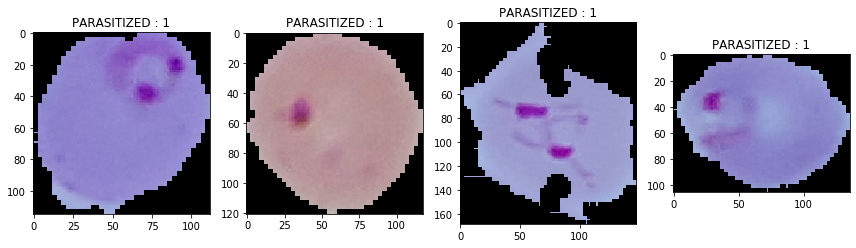

In [22]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('../cell_images/Parasitized' + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

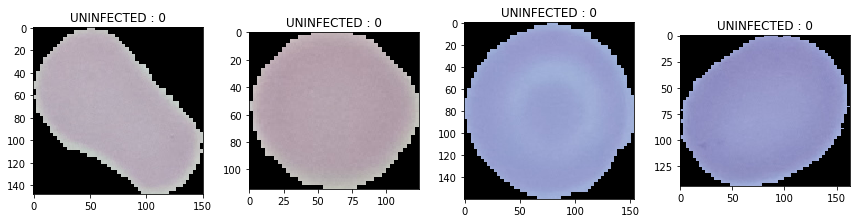

In [23]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('../cell_images/Uninfected' + "/" + uninfected_data[i+1])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

In [26]:
data = []
labels = []
for img in parasitized_data:
    try:
        img_read = plt.imread('../cell_images/Parasitized/' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread('../cell_images/Uninfected' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

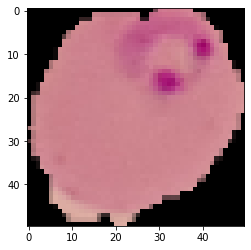

In [27]:
plt.imshow(data[0])
plt.show()

In [28]:
image_data = np.array(data)
labels = np.array(labels)

In [29]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)

In [31]:
y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [34]:
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (22046, 50, 50, 3)
SHAPE OF TESTING IMAGE DATA : (5512, 50, 50, 3)
SHAPE OF TRAINING LABELS : (22046, 2)
SHAPE OF TESTING LABELS : (5512, 2)


In [35]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers

In [36]:
def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

In [37]:
#instantiate the model
height = 50
width = 50
classes = 2
channels = 3
model = CNNbuild(height = height, width = width, classes = classes, channels = channels)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 32)       

In [38]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [39]:
h = model.fit(x_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
22046/22046 [==============================] - 60s 3ms/step - loss: 0.5435 - accuracy: 0.7758
Epoch 2/20
22046/22046 [==============================] - 55s 2ms/step - loss: 0.2242 - accuracy: 0.9185
Epoch 3/20
22046/22046 [==============================] - 56s 3ms/step - loss: 0.1907 - accuracy: 0.9340
Epoch 4/20
22046/22046 [==============================] - 56s 3ms/step - loss: 0.1754 - accuracy: 0.9409
Epoch 5/20
22046/22046 [==============================] - 55s 3ms/step - loss: 0.1688 - accuracy: 0.9444
Epoch 6/20
22046/22046 [==============================] - 58s 3ms/step - loss: 0.1671 - accuracy: 0.9466
Epoch 7/20
22046/22046 [==============================] - 58s 3ms/step - loss: 0.1577 - accuracy: 0.9482
Epoch 8/20
22046/22046 [==============================] - 58s 3ms/step - loss: 0.1567 - accuracy: 0.9492
Epoch 9/20
22046/22046 [==============================] - 55s 3ms/step - loss: 0.1551 - accuracy: 0.9493
Epoch 10/20
22046/22046 [==============================

In [58]:
import pickle

#
# Create your model here (same as above)
#

# Save to file in the current working directory
pkl_filename = "malaria_detect.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
# Calculate the accuracy score and predict target values
score = pickle_model.evaluate(x_test, y_test)
# print("Test score: {0:.2f} %".format(100 * score))
y_predict = pickle_model.predict(x_test)

print(f'LOSS : {score[0]}')
print(f'ACCURACY : {score[1]}')

5512/5512 [==============================] - 5s 835us/step
LOSS : 0.12956092502321664
ACCURACY : 0.956095814704895


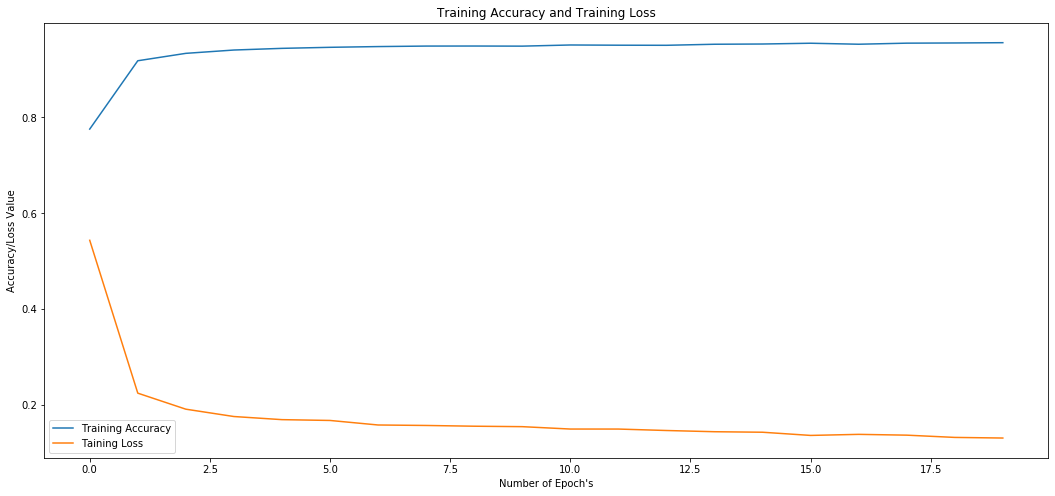

In [41]:
plt.figure(figsize = (18,8))
plt.plot(range(20), h.history['accuracy'], label = 'Training Accuracy')
plt.plot(range(20), h.history['loss'], label = 'Taining Loss')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")

In [42]:
predictions = model.evaluate(x_test, y_test)

5512/5512 [==============================] - 4s 740us/step


In [43]:
print(f'LOSS : {predictions[0]}')
print(f'ACCURACY : {predictions[1]}')

LOSS : 0.12956092502321664
ACCURACY : 0.956095814704895
